In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier,RidgeClassifier
from sklearn.metrics import (precision_score, recall_score,f1_score)
from sklearn.metrics import average_precision_score



In [2]:
df = pd.read_csv('UNSW_NB15.csv')
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
257669,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
257670,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
257671,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


 data length: 257673


C:\Users\MARWA\AppData\Local\Temp\ipykernel_9084\1936336916.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_xticklabels(["Normal", "Attack"])


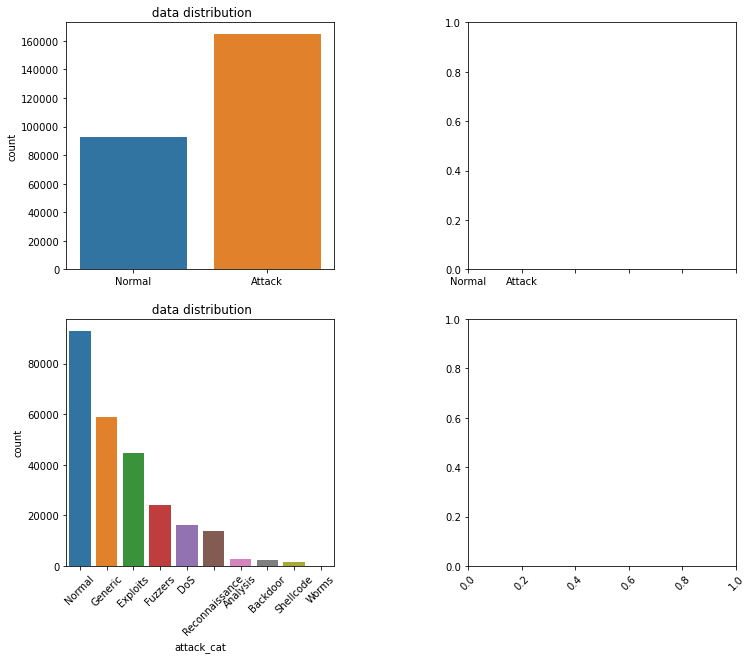

In [3]:
# Print the number of train / test samples
print(f" data length: {len(df)}")


# Visualise the distribution of attacks and normal traffic

f, axes = plt.subplots(2, 2, figsize=(12, 10))

# Create the plots
sns.countplot(x="label", data=df, ax=axes[0,0])
sns.countplot(x="attack_cat", data=df, ax=axes[1,0], order = df['attack_cat'].value_counts().index)

# Set the plot titles
axes[0,0].set_title(" data distribution")
axes[1,0].set_title(" data distribution")

# Rotate xticks for readability
axes[1,0].tick_params('x', labelrotation=45)
axes[1,1].tick_params('x', labelrotation=45)

# Change the xtick labels for attack / normal
axes[0,0].set_xticklabels(["Normal", "Attack"])
axes[0,1].set_xticklabels(["Normal", "Attack"])

# Remove xlabels
axes[0,0].set_xlabel("")
axes[0,1].set_xlabel("")


# Add some space between the plots for y labels
plt.subplots_adjust(wspace=0.50)

In [4]:
df.isnull().sum()


id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [5]:
df.attack_cat.value_counts()


Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: attack_cat, dtype: int64

In [6]:
df = df.drop(columns='id')


In [7]:
df.select_dtypes('object').columns


Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')

In [8]:
#is_attack = df.attack_cat.map(lambda a: 0 if a == 'Normal' else 1)
#df['attack_cat'] = is_attack



In [9]:
df.attack_cat.value_counts()


Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: attack_cat, dtype: int64

In [10]:
mask = (df.dtypes != np.object)
print(df.loc[:,mask].head())

list_cat = df.loc[:,mask].columns.tolist()
print(list_cat)

df.loc[:,mask].describe()

C:\Users\MARWA\AppData\Local\Temp\ipykernel_9084\1221794863.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = (df.dtypes != np.object)


        dur  spkts  dpkts  sbytes  dbytes         rate  sttl  dttl  \
0  0.000011      2      0     496       0   90909.0902   254     0   
1  0.000008      2      0    1762       0  125000.0003   254     0   
2  0.000005      2      0    1068       0  200000.0051   254     0   
3  0.000006      2      0     900       0  166666.6608   254     0   
4  0.000010      2      0    2126       0  100000.0025   254     0   

         sload  dload  ...  ct_src_dport_ltm  ct_dst_sport_ltm  \
0  180363632.0    0.0  ...                 1                 1   
1  881000000.0    0.0  ...                 1                 1   
2  854400000.0    0.0  ...                 1                 1   
3  600000000.0    0.0  ...                 2                 1   
4  850400000.0    0.0  ...                 2                 1   

   ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  \
0               2             0           0                 0           1   
1               2           

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,257673.000000,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,257673.000000,257673.000000,2.576730e+05,2.576730e+05,...,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000
mean,1.246715,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,180.000931,84.754957,7.060869e+07,6.582143e+05,...,5.238271,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,0.639077
std,5.974305,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,102.488268,112.762131,1.857313e+08,2.412372e+06,...,8.160822,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,0.480269
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,62.000000,0.000000,1.231800e+04,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,0.004285,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,254.000000,29.000000,7.439423e+05,1.747441e+03,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,0.685777,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,254.000000,252.000000,8.000000e+07,2.210538e+04,...,4.000000,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,1.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,2.242273e+07,...,59.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [11]:
#df = normalization(df.copy())

In [12]:
# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# using standard scaler for normalizing
std_scaler = StandardScaler()
scalerProps=dict()

def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    
    std_scaler = StandardScaler()
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
    if i =="src_bytes":
      print(std_scaler.transform([[491]]))
    scalerProps[i]=std_scaler
    
  return df
# selecting numeric attributes columns from data
#numeric_col = df.select_dtypes(include='number').columns
#numeric_col=numeric_col.drop(['attack_map'])
#numeric_col=numeric_col.drop(['attack_flag'])

In [13]:
# get the intial set of encoded features and encode them
features_to_encode = ['proto', 'service', 'state']
encoded = pd.get_dummies(df[features_to_encode])
encoded

,proto_3pc,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,...,state_CLO,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
257669,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
257670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
257671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [14]:
data = encoded.join(df)

In [15]:
data=data.drop(['proto', 'service', 'state', 'attack_cat'],axis=1)
data.head()

,proto_3pc,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0,0,0,0,0,0,0,0,0,0,...,1,1,2,0,0,0,1,2,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,2,0,0,0,1,2,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,3,0,0,0,1,3,0,0
3,0,0,0,0,0,0,0,0,0,0,...,2,1,3,0,0,0,2,3,0,0
4,0,0,0,0,0,0,0,0,0,0,...,2,1,3,0,0,0,2,3,0,0


In [16]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
feature_cols = data.columns.values.tolist()


X = data[feature_cols[:-1]] # Features

y = data.label # Target variable


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% testv

In [17]:
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import time
start_dt = time.time()

# Logistic Regression
log = LogisticRegression(solver = "liblinear")
y_pred_log_fit = log.fit(X_train, y_train)
y_pred_log = y_pred_log_fit.predict(X_test)
log_accuracy = accuracy_score(y_test, y_pred_log)
end_dt = time.time()
print("Time:" + str(end_dt - start_dt))
print ("Accuracy: " + str(accuracy_score(y_pred_log, y_test)))
print ("Precision: " + str(precision_score(y_pred_log, y_test)))
print ("Recall: " + str(recall_score(y_pred_log, y_test)))
print ("F1: " + str(f1_score(y_pred_log, y_test)))


Time:5.896208047866821
Accuracy: 0.8043517632144058
Precision: 0.9550044610268472
Recall: 0.7849238358721375
F1: 0.8616513291498197


In [18]:
import time
start_dt = time.time()


log =DecisionTreeClassifier()
y_pred_log_fit = log.fit(X_train, y_train)
y_pred_log = y_pred_log_fit.predict(X_test)
log_accuracy = accuracy_score(y_test, y_pred_log)



end_dt = time.time()

print("Time:" + str(end_dt - start_dt))
print ("Accuracy: " + str(accuracy_score(y_pred_log, y_test)))
print ("Precision: " + str(precision_score(y_pred_log, y_test)))
print ("Recall: " + str(recall_score(y_pred_log, y_test)))
print ("F1: " + str(f1_score(y_pred_log, y_test)))

Time:6.510076284408569
Accuracy: 0.93622415978888
Precision: 0.9487590234406683
Recall: 0.951150593592454
F1: 0.9499533032850123


In [ ]:
import time
from sklearn.svm import LinearSVC


start_svm = time.time()

#Import svm model
from sklearn import svm

#Create a svm Classifier

log = svm.SVC(kernel='linear') # Linear Kernel
y_pred_log_fit = log.fit(X_train, y_train)
y_pred_log = y_pred_log_fit.predict(X_test)
log_accuracy = accuracy_score(y_test, y_pred_log)



end_svm = time.time()

#print("Time:" + str(end_dt - start_dt))
print ("Accuracy: " + str(accuracy_score(y_pred_log, y_test)))
print ("Precision: " + str(precision_score(y_pred_log, y_test)))
print ("Recall: " + str(recall_score(y_pred_log, y_test)))
print ("F1: " + str(f1_score(y_pred_log, y_test)))

In [19]:
import time
from sklearn.naive_bayes import GaussianNB
start_nb = time.time()

clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_nb = clf.predict(X_test)

end_nb = time.time()
print("Time:" + str(end_nb - start_nb))
print ("Accuracy: " + str(accuracy_score(y_pred_nb, y_test)))
print ("Precision: " + str(precision_score(y_pred_nb, y_test)))
print ("Recall: " + str(recall_score(y_pred_nb, y_test)))
print ("F1: " + str(f1_score(y_pred_nb, y_test)))

Time:1.8509602546691895
Accuracy: 0.7685700240614732
Precision: 0.8665950198718468
Recall: 0.7907230609828301
F1: 0.8269223327270617


In [21]:
import time
from sklearn.neighbors import KNeighborsClassifier
start_knn = time.time()

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

end_knn = time.time()
print("Time:" + str(end_knn - start_knn))
print ("Accuracy: " + str(accuracy_score(y_pred_knn, y_test)))
print ("Precision: " + str(precision_score(y_pred_knn, y_test)))
print ("Recall: " + str(recall_score(y_pred_knn, y_test)))
print ("F1: " + str(f1_score(y_pred_knn, y_test)))

Time:266.64630913734436
Accuracy: 0.8514268712323096
Precision: 0.908589504420472
Recall: 0.8652698657912523
F1: 0.8864007279848864


In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier

start_rf = time.time()

# Import the model we are using

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

#Train the model using the training sets
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

end_rf = time.time()
print("Time:" + str(end_rf - start_rf))
print ("Accuracy: " + str(accuracy_score(y_pred_rf, y_test)))
print ("Precision: " + str(precision_score(y_pred_rf, y_test)))
print ("Recall: " + str(recall_score(y_pred_rf, y_test)))
print ("F1: " + str(f1_score(y_pred_rf, y_test)))